In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(30,30))

In [2]:
dados=pd.read_csv('Dados/aluguel_residencial.csv', sep=';')

In [4]:
valor=dados.Valor

In [11]:
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
IIQ=Q3-Q1
limite_inferior=Q1-(1.5*IIQ)
limite_superior=Q3+(1.5*IIQ)

In [12]:
sel=(valor>=limite_inferior)&(valor<=limite_superior)

In [14]:
new_dados=dados[sel]

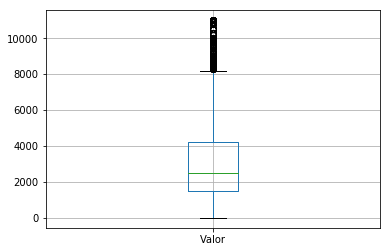

In [16]:
new_dados.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B20A690>]],
      dtype=object)

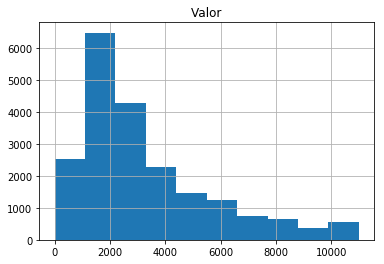

In [18]:
new_dados.hist(['Valor'])

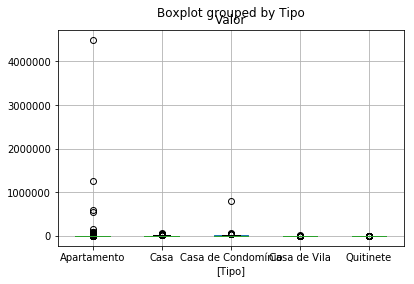

In [19]:
dados.boxplot(['Valor'],by=['Tipo'])

In [22]:
grupo_tipo=dados.groupby(['Tipo'])['Valor']

In [24]:
Q1=grupo_tipo.quantile(.25)
Q3=grupo_tipo.quantile(.75)
IIQ=Q3-Q1
limite_inferior=Q1-(1.5*IIQ)
limite_superior=Q3+(1.5*IIQ)

In [29]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [27]:
data_new=pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    isType=dados.Tipo==tipo
    isInLimit=(dados.Valor>=limite_inferior[tipo])&(dados.Valor<=limite_superior[tipo])
    sel=isType&isInLimit
    dados_sel=dados[sel]
    data_new=pd.concat([data_new, dados_sel])

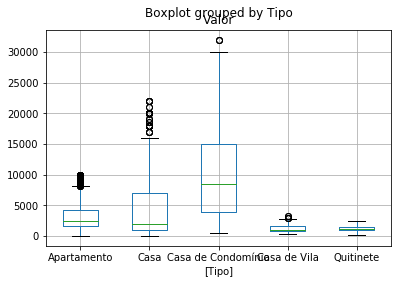

In [30]:
data_new.boxplot(['Valor'],by=['Tipo'])

In [31]:
data_new.to_csv('Dados/aluguel_residencial_sem_outliers.csv',index=False,sep=';')